#Problem definition:#
The goal of this project is to develop a machine learning model that predicts whether a student will pass or fail based on various personal, academic, and social attributes. We use the [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance) from the UCI Machine Learning Repository, which contains data on secondary school students in Portugal who studied **Math** and **Portuguese**.

To build a more comprehensive dataset, we combine information from two files (student-mat.csv and student-por.csv) by merging on key identifying attributes. The final target variable is a binary classification label:

* 1 (Pass) if the student’s final grade (G3) is ≥ 10,
* 0 (Fail) otherwise.

The objective is to accurately classify student performance using features such as study time, failures, absences, parental education, and more. This model can help educators and policymakers identify students at risk of failing and intervene early.

##Import Libraries & Load Data##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
d1 = pd.read_csv("/content/drive/MyDrive/Student Performance/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/drive/MyDrive/Student Performance/student-por.csv", sep=";")

# Add a new column 'subject' to each
d1['subject'] = 'Math'
d2['subject'] = 'Portuguese'

# Stack the datasets vertically
df = pd.concat([d1, d2], axis=0, ignore_index=True)

df.shape
df['subject'].value_counts()

,count
subject,
Portuguese,649
Math,395


## Exploratory Data Analysis ##


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

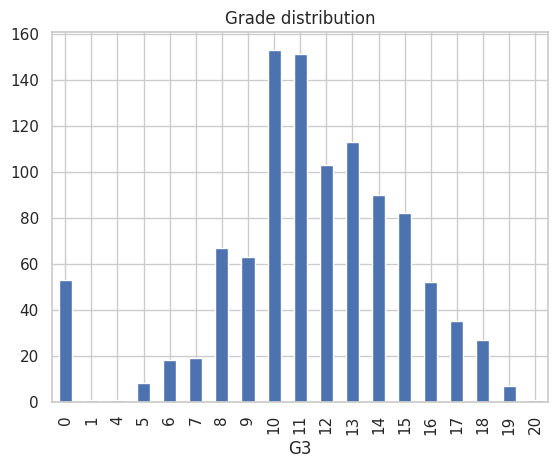

In [ ]:
df['G3'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Grade distribution")
plt.show()

In [ ]:
# Adding the label column
df["pass"] = df['G3'].apply(lambda x:0 if x<10 else 1)

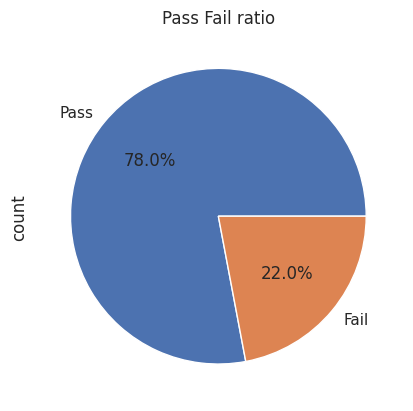

In [ ]:
df['pass'].value_counts().plot(kind='pie',
                                    labels=['Pass', "Fail"],
                                    autopct='%1.1f%%',)
plt.title("Pass Fail ratio")
plt.show()

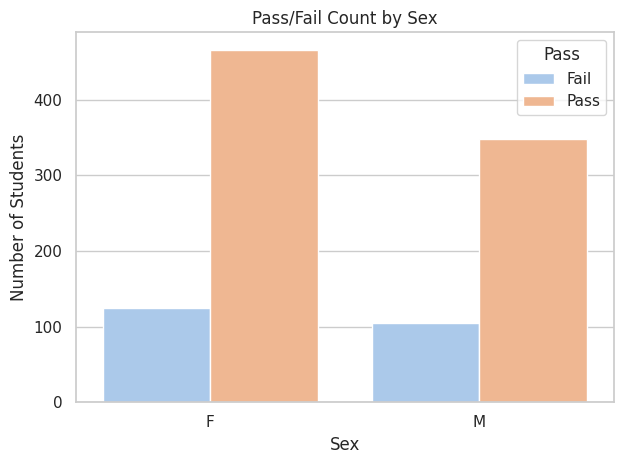

In [ ]:
sns.set(style="whitegrid")

sns.countplot(data=df, x='sex', hue='pass', palette='pastel')

plt.title("Pass/Fail Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.legend(title='Pass', labels=['Fail', 'Pass'])
plt.tight_layout()
plt.show()

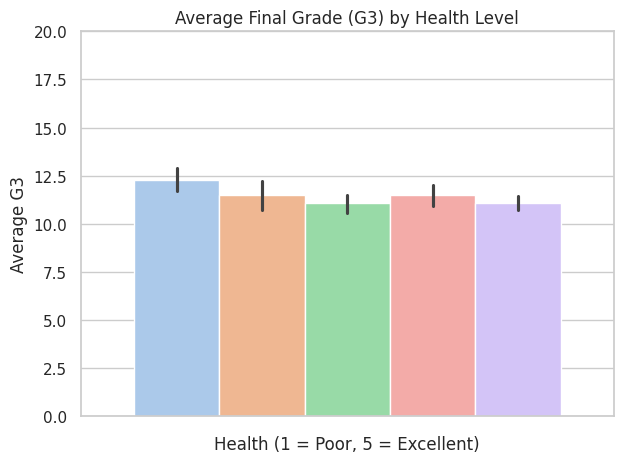

In [ ]:
# Compute average G3 for each health level

sns.barplot(data=df,
            hue='health',
            y='G3',
            estimator='mean',
            palette='pastel',
            legend=False)

plt.title("Average Final Grade (G3) by Health Level")
plt.xlabel("Health (1 = Poor, 5 = Excellent)")
plt.ylabel("Average G3")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

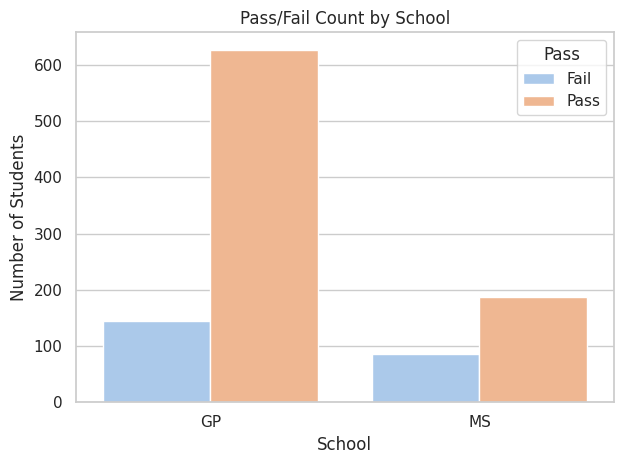

In [ ]:
sns.countplot(data=df, x='school', hue='pass', palette='pastel')

plt.title("Pass/Fail Count by School")
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.legend(title='Pass', labels=['Fail', 'Pass'])
plt.tight_layout()
plt.show()

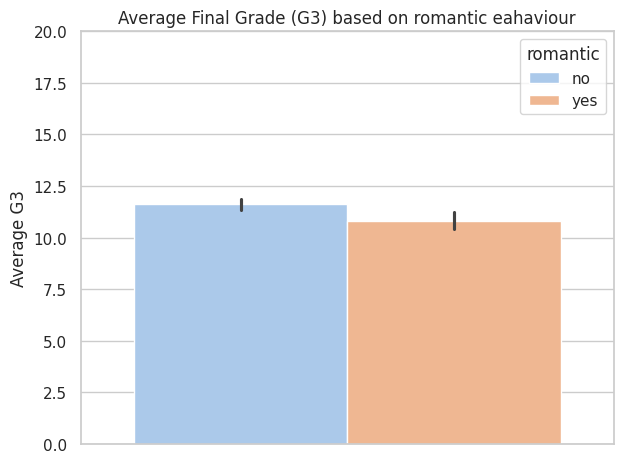

In [ ]:
sns.barplot(data=df,
            hue='romantic',
            y='G3',
            estimator='mean',
            palette='pastel',
            legend=True)

plt.title("Average Final Grade (G3) based on romantic eahaviour")
plt.ylabel("Average G3")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

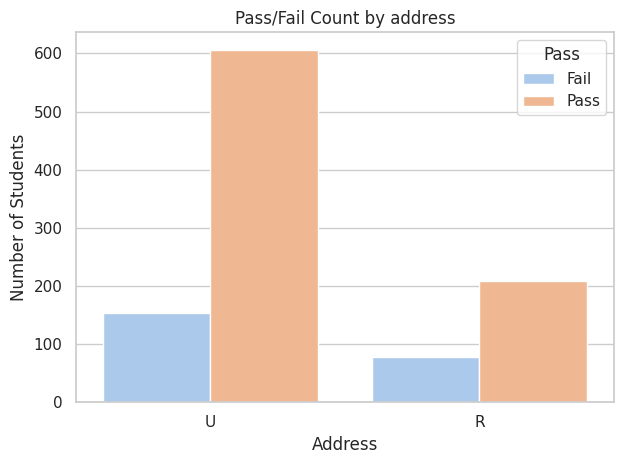

In [ ]:
sns.countplot(data=df, x='address', hue='pass', palette='pastel')

plt.title("Pass/Fail Count by address")
plt.xlabel("Address")
plt.ylabel("Number of Students")
plt.legend(title='Pass', labels=['Fail', 'Pass'])
plt.tight_layout()
plt.show()

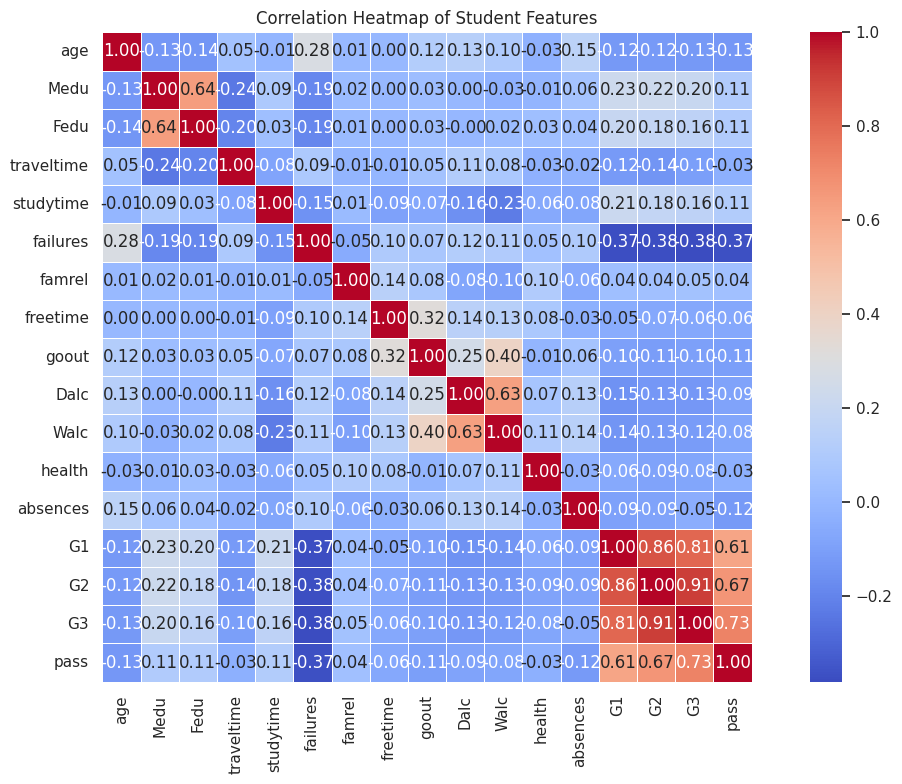

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Student Features")
plt.tight_layout()
plt.show()

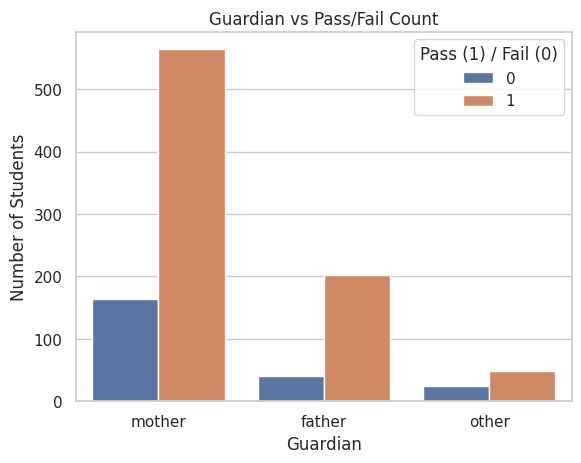

In [ ]:
sns.countplot(data=df, x='guardian', hue='pass')

plt.title("Guardian vs Pass/Fail Count")
plt.xlabel("Guardian")
plt.ylabel("Number of Students")
plt.legend(title='Pass (1) / Fail (0)', loc='upper right')

plt.show()

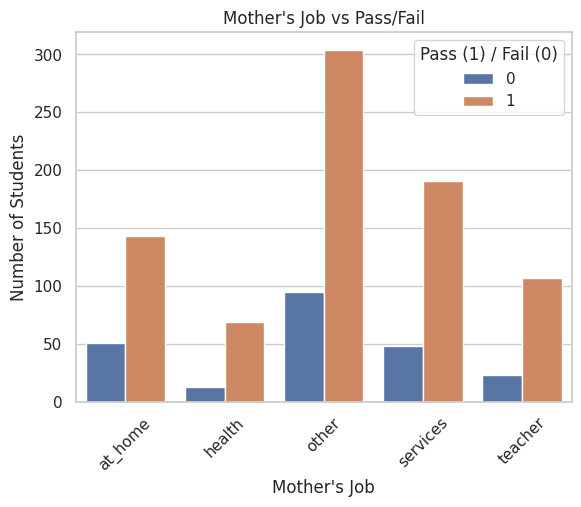

In [ ]:
sns.countplot(data=df, x='Mjob', hue='pass')

plt.title("Mother's Job vs Pass/Fail")
plt.xlabel("Mother's Job")
plt.ylabel("Number of Students")
plt.legend(title='Pass (1) / Fail (0)', loc='upper right')
plt.xticks(rotation=45)  # Rotate labels if needed for readability

plt.show()

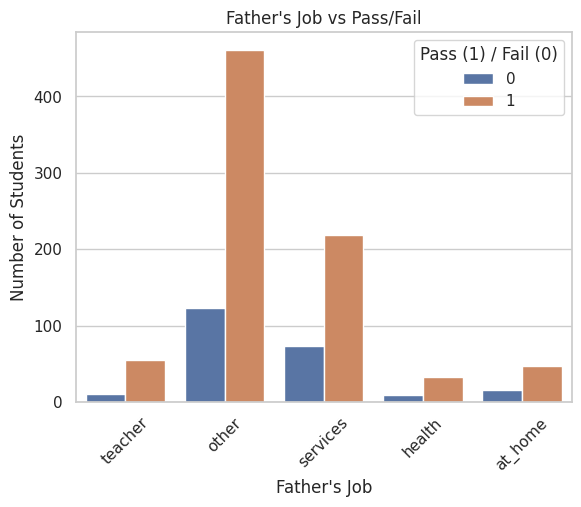

In [ ]:
sns.countplot(data=df, x='Fjob', hue='pass')

plt.title("Father's Job vs Pass/Fail")
plt.xlabel("Father's Job")
plt.ylabel("Number of Students")
plt.legend(title='Pass (1) / Fail (0)', loc='upper right')
plt.xticks(rotation=45)  # Rotate labels if needed for readability

plt.show()

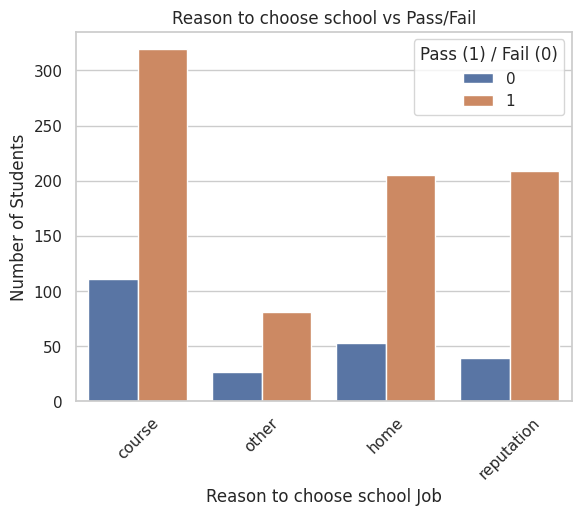

In [ ]:
sns.countplot(data=df, x='reason', hue='pass')

plt.title("Reason to choose school vs Pass/Fail")
plt.xlabel("Reason to choose school Job")
plt.ylabel("Number of Students")
plt.legend(title='Pass (1) / Fail (0)', loc='upper right')
plt.xticks(rotation=45)  # Rotate labels if needed for readability

plt.show()

## Feature Engineering ##


In [ ]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [ ]:
# Change in grades
df['change'] = df['G2'] - df['G1']
df['change'].head()

,change
0,1
1,0
2,1
3,-1
4,4


In [ ]:
# Mean Grade
df['G'] = (df['G1'] + df['G2']) / 2
df[['G', 'G3']].head()

,G,G3
0,5.5,6
1,5.0,6
2,7.5,10
3,14.5,15
4,8.0,10


In [ ]:
# Parent Education
df['Pedu'] = (df['Medu'] + df['Fedu']) / 2
df['Pedu'].head()

,Pedu
0,4.0
1,1.0
2,1.0
3,3.0
4,3.0


In [ ]:
binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic', 'subject']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head().T

,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [ ]:
df.drop(columns=['G3'], inplace=True)

## One Hot Encoding the categorical Features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

# Define column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

# Apply transformation
df_array = column_transformer.fit_transform(df)

# Get new column names
ohe = column_transformer.named_transformers_['cat']
ohe_cols = ohe.get_feature_names_out(categorical_cols)

# All other column names (non-categorical)
non_cat_cols = [col for col in df.columns if col not in categorical_cols]

# Combine all column names
all_cols = list(ohe_cols) + non_cat_cols

# Create the new DataFrame
df_encoded = pd.DataFrame(df_array, columns=all_cols)


In [ ]:
df_encoded.head().T

,0,1,2,3,4
Mjob_health,0.0,0.0,0.0,1.0,0.0
Mjob_other,0.0,0.0,0.0,0.0,1.0
Mjob_services,0.0,0.0,0.0,0.0,0.0
Mjob_teacher,0.0,0.0,0.0,0.0,0.0
Fjob_health,0.0,0.0,0.0,0.0,0.0
Fjob_other,0.0,1.0,1.0,0.0,1.0
Fjob_services,0.0,0.0,0.0,1.0,0.0
Fjob_teacher,1.0,0.0,0.0,0.0,0.0
reason_home,0.0,0.0,0.0,1.0,1.0
reason_other,0.0,0.0,1.0,0.0,0.0


## Creating X and y

In [ ]:
X = df_encoded.drop(columns=['pass'])
y = df_encoded['pass']

In [ ]:
X

,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,...,Walc,health,absences,G1,G2,subject,change,G,Pedu,support
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,6.0,5.0,6.0,0.0,1.0,5.5,4.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,4.0,5.0,5.0,0.0,0.0,5.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,3.0,10.0,7.0,8.0,0.0,1.0,7.5,1.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,5.0,2.0,15.0,14.0,0.0,-1.0,14.5,3.0,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,5.0,4.0,6.0,10.0,0.0,4.0,8.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,5.0,4.0,10.0,11.0,1.0,1.0,10.5,2.5,0.0
1040,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,15.0,15.0,1.0,0.0,15.0,2.0,1.0
1041,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,5.0,6.0,11.0,12.0,1.0,1.0,11.5,1.0,0.0
1042,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,6.0,10.0,10.0,1.0,0.0,10.0,2.0,0.0


In [ ]:
y

,pass
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1039,1.0
1040,1.0
1041,0.0
1042,1.0


## Splitting the Data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((835, 46), (209, 46), (835,), (209,))

## Feature Scaling

In [ ]:
X.columns

Index(['Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'school', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'subject', 'change', 'G', 'Pedu',
       'support'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age','Medu', 'Fedu','traveltime', 'studytime','failures','famrel', 'freetime', 'goout', 'Dalc',
                'Walc', 'health', 'absences', 'G1', 'G2', 'change', 'G', 'Pedu','support']

# Create the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # keep all other features as-is
)

X_train = column_transformer.fit_transform(X_train)

In [ ]:
X_train

array([[ 1.00178457,  0.35772384, -1.24658513, ...,  1.        ,
         1.        ,  1.        ],
       [-1.39046553,  1.24144988,  1.47353312, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.79920127, -0.52600221,  0.56682704, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.59304883,  1.24144988,  1.47353312, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20436787, -1.40972825, -0.33987905, ...,  1.        ,
         0.        ,  1.        ],
       [-0.59304883, -0.52600221, -0.33987905, ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
X_test = column_transformer.transform(X_test)
X_test

array([[ 0.20436787,  0.35772384,  1.47353312, ...,  1.        ,
         1.        ,  1.        ],
       [-1.39046553, -0.52600221, -0.33987905, ...,  1.        ,
         0.        ,  0.        ],
       [-1.39046553,  0.35772384, -0.33987905, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00178457, -0.52600221, -1.24658513, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.20436787, -0.52600221, -1.24658513, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.00178457, -0.52600221, -0.33987905, ...,  1.        ,
         0.        ,  0.        ]])

## Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def evaluate_classification(y_true, y_pred):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1_score': f1
    }

In [ ]:
evaluate_classification(y_train, model.predict(X_train))

{'precision': 0.958966565349544,
 'recall': 0.9692780337941628,
 'accuracy': 0.9437125748502994,
 'f1_score': 0.9640947288006112}

In [ ]:
evaluate_classification(y_test, model.predict(X_test))

{'precision': 0.9408284023668639,
 'recall': 0.9754601226993865,
 'accuracy': 0.9330143540669856,
 'f1_score': 0.9578313253012049}

In [ ]:
evaluate_classification(y_test, rf_model.predict(X_test))

{'precision': 0.9411764705882353,
 'recall': 0.9815950920245399,
 'accuracy': 0.937799043062201,
 'f1_score': 0.960960960960961}

## Cross Val Score


In [ ]:
from sklearn.model_selection import cross_val_score

lg_cv_f1 = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=10, scoring='f1')
print(f"Logistic Regression cross val F1 scores: {lg_cv_f1}")
print(f"Mean F1: {lg_cv_f1.mean()}")

Logistic Regression cross val F1 scores: [0.94736842 0.96240602 0.95588235 0.95238095 0.93430657 0.93023256
 0.96875    0.93233083 0.94488189 0.91338583]
Mean F1: 0.9441925412498057


In [ ]:
from sklearn.model_selection import cross_val_score

rf_cv_f1 = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10, scoring='f1')
print(f"Random Forest cross val F1 scores: {rf_cv_f1}")
print(f"Mean F1: {rf_cv_f1.mean()}")

Random Forest cross val F1 scores: [0.96183206 0.96240602 0.94890511 0.96124031 0.93430657 0.90909091
 0.97674419 0.94656489 0.928      0.93023256]
Mean F1: 0.9459322603789072


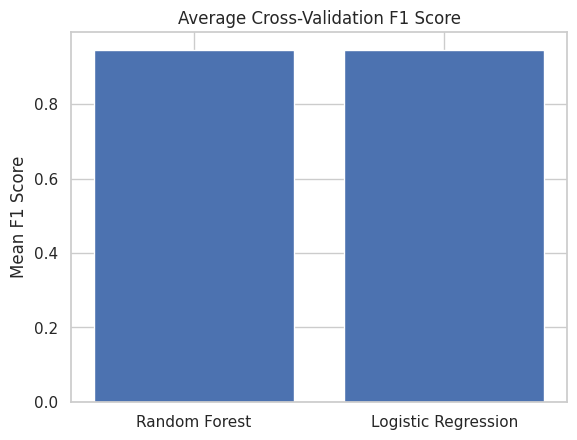

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Logistic Regression']
mean_scores = [rf_cv_f1.mean(), lg_cv_f1.mean()]

plt.bar(models, mean_scores)
plt.ylabel('Mean F1 Score')
plt.title('Average Cross-Validation F1 Score')
plt.show()


## Making a pipeline


In [ ]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,support
971,1,1,18,0,0,1,3,2,other,other,...,5,5,5,5,5,8,9,10,1,1
280,0,1,17,1,1,0,4,1,services,other,...,5,4,2,4,5,30,8,8,0,1
536,0,0,16,0,0,1,1,1,at_home,other,...,1,3,1,1,3,0,14,13,1,1
824,1,1,16,0,1,0,4,4,at_home,other,...,3,2,1,3,2,5,10,11,1,1
644,0,1,16,1,0,1,3,2,at_home,other,...,3,3,1,3,2,0,12,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0,0,18,0,0,1,2,2,other,other,...,2,3,1,1,5,4,11,11,1,1
848,1,0,16,1,0,1,1,2,other,services,...,3,2,1,2,4,0,10,8,1,1
617,0,0,16,1,0,1,1,1,at_home,other,...,3,2,1,4,5,2,12,13,1,1
458,0,0,16,1,0,1,4,3,teacher,health,...,4,4,2,4,4,0,14,13,1,2


In [ ]:
evaluate_classification(y_test, pipeline.predict(X_test))

{'precision': 0.8819875776397516,
 'recall': 0.9530201342281879,
 'accuracy': 0.8755980861244019,
 'f1_score': 0.9161290322580645}

In [8]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# === Step 1: Custom Feature Engineering Transformer ===
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['change'] = X['G2'] - X['G1']
        X['G'] = (X['G1'] + X['G2']) / 2
        X['Pedu'] = (X['Medu'] + X['Fedu']) / 2
        return X

# === Step 2: Binary Label Encoding Transformer ===
class BinaryLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, binary_cols):
        self.binary_cols = binary_cols
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.binary_cols:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.binary_cols:
            X[col] = self.encoders[col].transform(X[col])
        return X

# === Your Columns ===
binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
               'famsup', 'paid', 'activities', 'nursery', 'higher',
               'internet', 'romantic', 'subject']
categorical_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                'absences', 'G1', 'G2', 'change', 'G', 'Pedu']

# === Step 3: Column Transformer ===
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
    ('scale', StandardScaler(), numeric_cols)
], remainder='passthrough')  # binary label-encoded features will pass through

# === Step 4: Full Pipeline ===
pipeline = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),
    ('label_encode_binary', BinaryLabelEncoder(binary_cols=binary_cols)),
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression())  # You can replace this with any model
])

# === Step 5: Usage ===
# Example:
# df = pd.read_csv(...)  # Load your dataset
# X = df.drop('target', axis=1)
# y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the pipeline
# pipeline.fit(X_train, y_train)

# Predict
# y_pred = pipeline.predict(X_test)


In [2]:
# Load the datasets
d1 = pd.read_csv("/content/drive/MyDrive/Student Performance/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/drive/MyDrive/Student Performance/student-por.csv", sep=";")

# Add a new column 'subject' to each
d1['subject'] = 'Math'
d2['subject'] = 'Portuguese'

# Stack the datasets vertically
df = pd.concat([d1, d2], axis=0, ignore_index=True)
df["pass"] = df['G3'].apply(lambda x:0 if x<10 else 1)
df.drop(columns=['G3'], inplace=True)

In [4]:
X = df.drop(columns=['pass'])
y = df['pass']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
p = pipeline.fit(X_train, y_train)

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def evaluate_classification(y_true, y_pred):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1_score': f1
    }

In [12]:
evaluate_classification(y_test, p.predict(X_test))

{'precision': 0.9367088607594937,
 'recall': 0.961038961038961,
 'accuracy': 0.9234449760765551,
 'f1_score': 0.9487179487179487}

In [13]:
import joblib
joblib.dump(pipeline, "grade_classification_model.pkl")

['grade_classification_model.pkl']